In [1]:
# Start loading libraries

#! pip install yfinance

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#! pip install pmdarima
import pmdarima as pm
from pmdarima import model_selection

import scipy
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_acf

#from matplotlib.ticker import NullFormatter
#import yfinance as yf
#import warnings; warnings.simplefilter('ignore')
#%matplotlib inline

In [2]:
xls_file = pd.ExcelFile("Data_weekly_final.xlsx") # Read Excel
df1=xls_file.parse("WTI") # Read the first sheet (Portfolio holdings)

#df1["Timestamp"] = df1["Date"].astype('datetime64[ns]') # Convert column to date format
df1 = df1.set_index(['Timestamp']) # use first column as index

#df1.to_excel("values.xlsx")  #print to excel


df1.head()

,LCOc1,LCOc3,LCOc6,LCOc9,LCOc12
Timestamp,,,,,
1988-06-24,15.65,NaN,NaN,NaN,NaN
1988-07-01,14.60,NaN,NaN,NaN,NaN
1988-07-08,15.05,NaN,NaN,NaN,NaN
1988-07-15,14.18,NaN,NaN,NaN,NaN
1988-07-22,15.71,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Timestamp'>

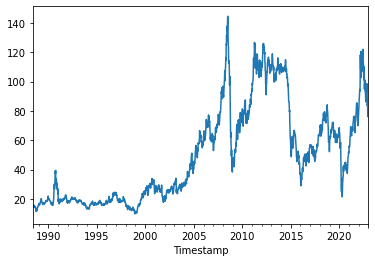

In [3]:
spot = df1["CLc1"]
#spot = np.log(spot).diff()
spot.plot()

In [4]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot.describe()
#spot.dropna().describe()

count    1801.000000
mean       49.911816
std        33.030132
min         9.820000
25%        19.530000
50%        43.000000
75%        71.970000
max       144.490000
Name: LCOc1, dtype: float64

In [5]:
print("Skewness spot:", scipy.stats.skew(spot.dropna(), axis=0, bias=True))
print("Skewness logs:", scipy.stats.skew(np.log(spot.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot.dropna(), axis=0, fisher=False, bias=True))
print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot.dropna()))
print("JB logs:", scipy.stats.jarque_bera(np.log(spot.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot.dropna(), lags=[6]))
print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot.dropna()), lags=[6]))

Skewness spot: 0.691695153449477
Skewness logs: 0.015827313059215038
Kurtosis spot: 2.2854895841635536
Kurtosis logs: 1.6126669502952047
JB spot: Jarque_beraResult(statistic=181.9230529118715, pvalue=0.0)
JB logs: Jarque_beraResult(statistic=144.5073627537662, pvalue=0.0)
Q(6) spot:         lb_stat  lb_pvalue
6  10553.130306        0.0
Q(6) logs:         lb_stat  lb_pvalue
6  10591.172055        0.0


In [6]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot.dropna()))
print("ADF logs:", adfuller(np.log(spot.dropna())))

print("PP spot:", PhillipsPerron(spot.dropna()).summary().as_text())
print("PP logs:", PhillipsPerron(np.log(spot.dropna())).summary().as_text())



ADF spot: (-2.056944382336808, 0.2621759904951715, 19, 1781, {'1%': -3.43402700734663, '5%': -2.8631641942387542, '10%': -2.56763466996284}, 8413.176454101644)
ADF logs: (-1.7651026377262662, 0.3979196595025477, 5, 1795, {'1%': -3.4339982875683357, '5%': -2.863151515989605, '10%': -2.567627919165742}, -5656.637726558849)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.009
P-value                         0.283
Lags                               25
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
PP logs:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.666
P-value                         0.449
Lags                               25
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process c

In [7]:

print("KPSS spot:", KPSS(spot.dropna()).summary().as_text())
print("KPSS logs:", KPSS(np.log(spot.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  4.066
P-value                         0.000
Lags                               27
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
KPSS logs:     KPSS Stationarity Test Results   
Test Statistic                  4.946
P-value                         0.000
Lags                               27
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:
ACF and PACF logs:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


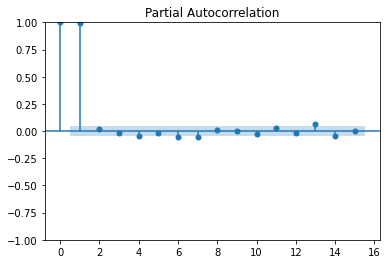

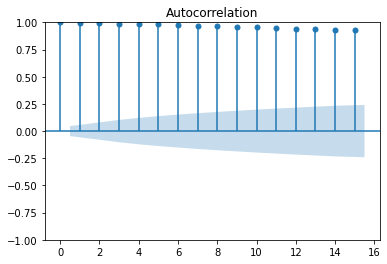

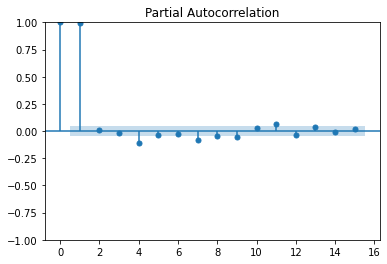

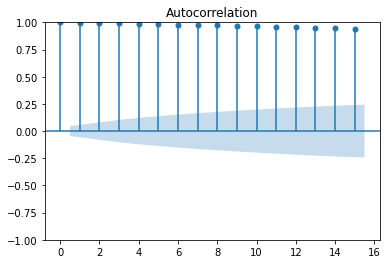

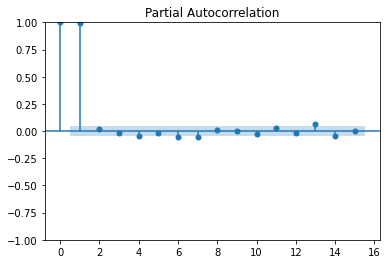

In [8]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot.dropna(), lags = 15)
plot_pacf(spot.dropna(), lags = 15)


print("ACF and PACF logs:")
plot_acf(np.log(spot.dropna()), lags = 15)
plot_pacf(np.log(spot.dropna()), lags = 15)



0.6782943507735172

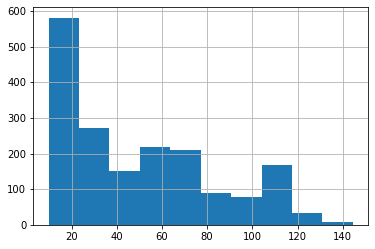

In [9]:
spot.hist()
0.6782943507735172

<AxesSubplot:>

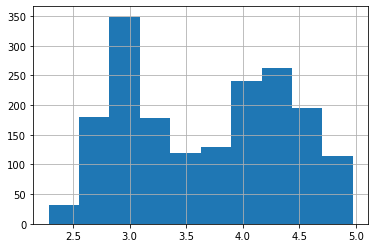

In [10]:
np.log(spot).hist()

In [12]:
# Load the data and split it into separate pieces
data = np.array(spot.dropna())
train, test = model_selection.train_test_split(data, train_size=1200)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5261.975, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5272.003, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5273.818, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5273.843, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5271.677, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5257.718, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5268.578, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5270.718, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5261.296, Time=0.19 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5267.157, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5254.949, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5268.450, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5267.416, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=5265.680, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept

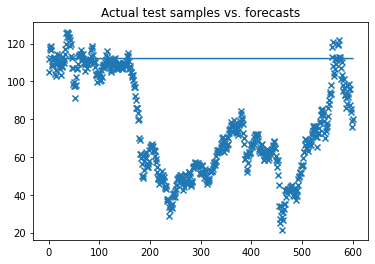

In [13]:
# Fit a simple auto_arima model
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [14]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1200
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -2622.886
Date:                Tue, 20 Dec 2022   AIC                           5253.773
Time:                        21:06:50   BIC                           5274.130
Sample:                             0   HQIC                          5261.442
                               - 1200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7847      0.038     20.588      0.000       0.710       0.859
ar.L2          0.0924      0.015      6.010      0.000       0.062       0.123
ma.L1         -0.8102      0.040    -20.425      0.000      -0.888      -0.732
sigma2         4.6537      0.073     63.335      0.000       4.510       4.798
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7953.91
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              11.01   Skew:                            -1.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

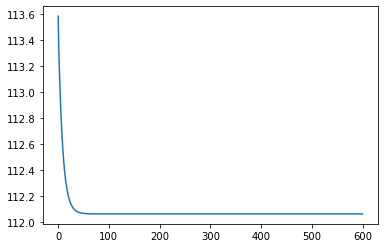

In [15]:
plt.plot(x, arima.predict(n_periods=test.shape[0]))

In [16]:
arima.predict(n_periods=test.shape[0])

array([113.58409386, 113.36278699, 113.22371071, 113.0941245 ,
       112.97958576, 112.87773162, 112.78722171, 112.70678585,
       112.63530346, 112.57177784, 112.51532332, 112.46515281,
       112.42056682, 112.38094375, 112.34573116, 112.31443812,
       112.28662834, 112.26191409, 112.23995082, 112.22043229,
       112.20308639, 112.18767129, 112.17397205, 112.16179769,
       112.15097846, 112.14136354, 112.13281886, 112.1252253 ,
       112.11847699, 112.11247984, 112.10715024, 112.10241388,
       112.09820473, 112.0944641 , 112.09113985, 112.08818562,
       112.08556023, 112.08322708, 112.08115363, 112.07931098,
       112.07767343, 112.07621817, 112.07492489, 112.07377556,
       112.07275417, 112.07184647, 112.07103981, 112.07032294,
       112.06968586, 112.0691197 , 112.06861656, 112.06816942,
       112.06777206, 112.06741892, 112.06710509, 112.0668262 ,
       112.06657835, 112.06635809, 112.06616234, 112.06598839,
       112.06583379, 112.06569641, 112.06557432, 112.06

<AxesSubplot:xlabel='Timestamp'>

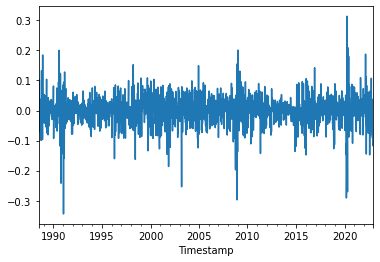

In [18]:
spot2 = np.log(spot).diff()
spot2.plot()

In [19]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot2.describe()
#spot.dropna().describe()

count    1800.000000
mean        0.000909
std         0.049472
min        -0.343901
25%        -0.022642
50%         0.003125
75%         0.027294
max         0.313519
Name: LCOc1, dtype: float64

In [20]:
print("Skewness spot:", scipy.stats.skew(spot2.dropna(), axis=0, bias=True))
#print("Skewness logs:", scipy.stats.skew(np.log(spot2.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot2.dropna(), axis=0, fisher=False, bias=True))
#print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot2.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot2.dropna()))
#print("JB logs:", scipy.stats.jarque_bera(np.log(spot2.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot2.dropna(), lags=[6]))
#print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot2.dropna()), lags=[6]))

Skewness spot: -0.6151471970262871
Kurtosis spot: 8.615984494540376
JB spot: Jarque_beraResult(statistic=2478.967960421633, pvalue=0.0)
Q(6) spot:      lb_stat  lb_pvalue
6  12.055203   0.060749


In [21]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot2.dropna()))
#print("ADF logs:", adfuller(np.log(spot2.dropna())))

print("PP spot:", PhillipsPerron(spot2.dropna()).summary().as_text())
#print("PP logs:", PhillipsPerron(np.log(spot2.dropna())).summary().as_text())

ADF spot: (-17.1207202646874, 7.259680445319301e-30, 4, 1795, {'1%': -3.4339982875683357, '5%': -2.863151515989605, '10%': -2.567627919165742}, -5651.241842608104)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                -43.728
P-value                         0.000
Lags                               25
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [22]:
print("KPSS spot:", KPSS(spot2.dropna()).summary().as_text())
#print("KPSS logs:", KPSS(np.log(spot2.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  0.038
P-value                         0.943
Lags                               11
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


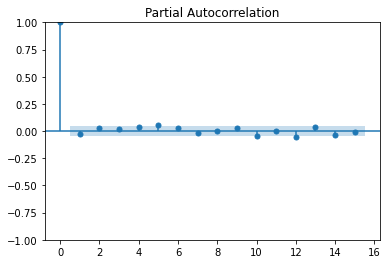

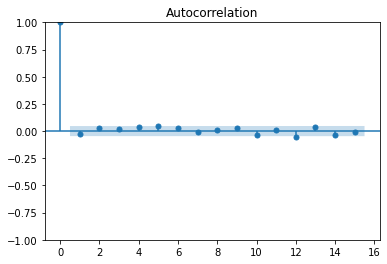

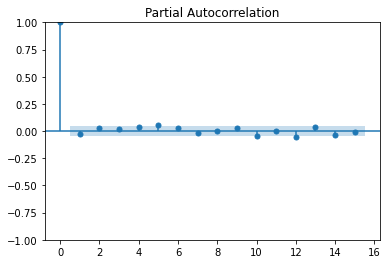

In [23]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot2.dropna(), lags = 15)
plot_pacf(spot2.dropna(), lags = 15)


#print("ACF and PACF logs:")
#plot_acf(np.log(spot2.dropna()), lags = 15)
#plot_pacf(np.log(spot2.dropna()), lags = 15)


<AxesSubplot:>

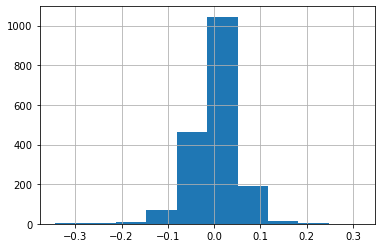

In [24]:
spot2.hist()


In [26]:
# Load the data and split it into separate pieces
data2 = np.array(spot2.dropna())
train2, test2 = model_selection.train_test_split(data2, train_size=1200)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-3835.585, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3827.376, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3833.777, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3832.946, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-3837.740, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-3835.274, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-3832.469, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-3835.358, Time=0.12 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-3836.497, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-3823.711, Time=0.07 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-3833.846, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-3836.565, Time=0.13 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 1.124 seconds


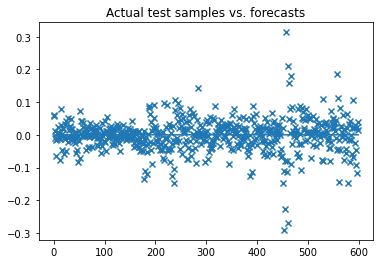

In [27]:
# Fit a simple auto_arima model
arima2 = pm.auto_arima(train2, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x2 = np.arange(test2.shape[0])
plt.scatter(x2, test2, marker='x')
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [28]:
arima2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1200
Model:               SARIMAX(1, 0, 2)   Log Likelihood                1922.870
Date:                Tue, 20 Dec 2022   AIC                          -3837.740
Time:                        21:10:47   BIC                          -3817.380
Sample:                             0   HQIC                         -3830.071
                               - 1200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6575      0.152      4.321      0.000       0.359       0.956
ma.L1         -0.7439      0.156     -4.781      0.000      -1.049      -0.439
ma.L2          0.1175      0.022      5.385      0.000       0.075       0.160
sigma2         0.0024    5.6e-05     42.404      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1156.82
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                            -0.79
Prob(H) (two-sided):                  0.19   Kurtosis:                         7.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

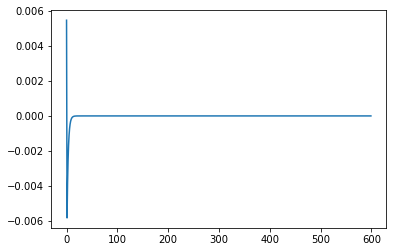

In [29]:
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))

In [30]:
arima2.predict(n_periods=test2.shape[0])

array([ 5.46981372e-003, -5.83087251e-003, -3.83402953e-003,
       -2.52102621e-003, -1.65767454e-003, -1.08998664e-003,
       -7.16709371e-004, -4.71264787e-004, -3.09875255e-004,
       -2.03755249e-004, -1.33977143e-004, -8.80952758e-005,
       -5.79261317e-005, -3.80887249e-005, -2.50448446e-005,
       -1.64679769e-005, -1.08283468e-005, -7.12006673e-006,
       -4.68172577e-006, -3.07842005e-006, -2.02418306e-006,
       -1.33098050e-006, -8.75172376e-007, -5.75460487e-007,
       -3.78388053e-007, -2.48805126e-007, -1.63599221e-007,
       -1.07572965e-007, -7.07334833e-008, -4.65100657e-008,
       -3.05822096e-008, -2.01090136e-008, -1.32224726e-008,
       -8.69429922e-009, -5.71684596e-009, -3.75905255e-009,
       -2.47172588e-009, -1.62525763e-009, -1.06867123e-009,
       -7.02693647e-010, -4.62048894e-010, -3.03815441e-010,
       -1.99770681e-010, -1.31357132e-010, -8.63725147e-011,
       -5.67933480e-011, -3.73438749e-011, -2.45550762e-011,
       -1.61459348e-011,

In [ ]:
#cointegration tests

#normalized cv
#LR test

In [ ]:
#correlaatiomatriisi

In [ ]:
#np.argwhere(np.isnan(x))